<a href="https://colab.research.google.com/github/cs20m016/cs6910-Assignment-1/blob/main/RmsProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from random import random
from random import seed

In [79]:
from keras.datasets import fashion_mnist

In [81]:
(train_X,trainY),(test_X,testY)=fashion_mnist.load_data()

In [82]:
print('Train: X=%s, y=%s' %(train_X.shape,trainY.shape))
print('Test: X=%s, y=%s' %(test_X.shape,testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [83]:
class_label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [84]:
sample=[]
for label in range(10):
    for i in range(len(testY)):
        if label==testY[i]:
            sample.append(test_X[i])
            break

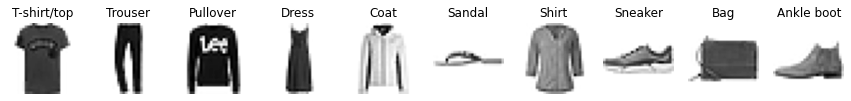

In [85]:
fig=plt.figure(figsize=(15,15))
rows=1
columns=10
for i in range(1, columns*rows +1):
    tg=sample[i-1]
    ax=fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(tg,cmap=plt.cm.binary)
    ax.title.set_text(class_label[i-1])
plt.show()

In [86]:
trainX=[train_X[i].flatten() for i in range(len(train_X))]
print(np.shape(trainX))
print(np.shape(trainY))

(60000, 784)
(60000,)


In [87]:
testX=[test_X[i].flatten() for i in range(len(test_X))]
np.shape(testX)
np.shape(testY)

(10000,)

In [102]:
#No of Layers
L=3
#size of each hidden layer
N=3

In [147]:
def initialize_weights(n_input, n_hidden_layer, n_output,neurons_hl):
    W = list()
    W.append([[random() for j in range(n_input)]for i in range(neurons_hl)])
    for i in range(n_hidden_layer-1):
        W.append([[random() for j in range(neurons_hl)]for i in range(neurons_hl)])
    W.append([[random() for j in range(neurons_hl)]for i in range(n_output)])
    return W
W=initialize_weights(len(trainX[0]),L-1,10,N)

In [150]:
print(np.shape(W[0]))
print(np.shape(W[1]))
print(np.shape(W[2]))

(3, 784)
(3, 3)
(10, 3)


In [109]:
def initialize_bias(n_input, n_hidden_layer, n_output,neurons_hl):
    B=list()
    for i in range(n_hidden_layer):
        B.append([random() for i in range(neurons_hl)])
    B.append([random() for i in range(n_output)])
    return B
B= initialize_bias(len(trainX[0]),L-1,10,N)

In [151]:
print(np.shape(B[0]))
print(np.shape(B[1]))
print(np.shape(B[2]))

(3,)
(3,)
(10,)


In [152]:
def sigmoid(a):
  h=list()
  for el in a:
    h.append(1/(1+np.exp(-el)))
  return h

In [159]:
def softmax(a):
  h=list()
  sum=0
  for el in a:
    sum+=np.exp(el)
  for el in a:
    h.append(np.exp(el)/sum)
  return h

In [163]:
def feed_forward(input,W,B,L):
    h=input
    for i in range(1,L):
        a=B[i-1]+np.matmul(W[i-1],h)
        h=sigmoid(a)
    a=B[L-1]+np.matmul(W[L-1],h)
    h=softmax(a)
    return h

In [ ]:
hL=feed_forward(trainX[0],W,B,L)